In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/My Drive/ML/Bigmart sales")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
ls

Test_BGM.csv  train_BGM.csv


In [0]:
train=pd.read_csv("train_BGM.csv")

In [0]:
x=train

In [12]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [0]:
object=[]
integer=[]
float=[]
categorical=[]
for i in train:
  #print(i+" has dtype as: "+str(train[i].dtype))
  if train[i].dtype=='object':
    object.append(i)
  elif train[i].dtype=='int64':
    integer.append(i)
  elif train[i].dtype=='float64':
    float.append(i)
    
df=pd.DataFrame([object,integer,float])
df.index=['object','integer','float']

In [0]:
df2=df.T


In [398]:
df2

,object,integer,float
0,Item_Identifier,Outlet_Establishment_Year,Item_Weight
1,Item_Fat_Content,None,Item_Visibility
2,Item_Type,None,Item_MRP
3,Outlet_Identifier,None,Item_Outlet_Sales
4,Outlet_Size,None,None
5,Outlet_Location_Type,None,None
6,Outlet_Type,None,None


In [399]:
cat=[]
num=[]
for i in df:
    if df[i]=='cat':
       cat.append(i)
    elif df[i].variable.type=='num':
       num.append(i)
df1=pd.DataFrame([cat,num])
df1.index=['cat','num']

ValueError: ignored

In [24]:
for i in train:
  print(i, "             ",train[i].mode())

Item_Identifier               0    FDG33
1    FDW13
dtype: object
Item_Weight               0    12.15
dtype: float64
Item_Fat_Content               0    Low Fat
dtype: object
Item_Visibility               0    0.0
dtype: float64
Item_Type               0    Fruits and Vegetables
dtype: object
Item_MRP               0    172.0422
dtype: float64
Outlet_Identifier               0    OUT027
dtype: object
Outlet_Establishment_Year               0    1985
dtype: int64
Outlet_Size               0    Medium
dtype: object
Outlet_Location_Type               0    Tier 3
dtype: object
Outlet_Type               0    Supermarket Type1
dtype: object
Item_Outlet_Sales               0    958.752
dtype: float64


In [400]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [401]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [0]:
del mode

In [17]:
for i train:

0    FDG33
1    FDW13
dtype: object
0    12.15
dtype: float64
0    Low Fat
dtype: object
0    0.0
dtype: float64
0    Fruits and Vegetables
dtype: object
0    172.0422
dtype: float64
0    OUT027
dtype: object
0    1985
dtype: int64
0    Medium
dtype: object
0    Tier 3
dtype: object
0    Supermarket Type1
dtype: object
0    958.752
dtype: float64


In [403]:
train.Item_Weight.mode()

0    12.15
dtype: float64

In [0]:
#finding percentage of missing values
percent_missing = train.isnull().sum() * 100 / len(train)

In [405]:
percent_missing

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [0]:
#filling nan values with mode
for column in train.columns:
    train[column].fillna(train[column].mode()[0], inplace=True)

In [407]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.150,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [0]:
train1=train

In [0]:
del train1['Item_Identifier']

In [410]:
mode=[]
for i in train1[i]:
   print(train1[i].mode())

KeyError: ignored

In [411]:
train.quantile(.25)

Item_Weight                     9.310000
Item_Visibility                 0.026989
Item_MRP                       93.826500
Outlet_Establishment_Year    1987.000000
Item_Outlet_Sales             834.247400
Name: 0.25, dtype: float64

In [412]:
train.quantile(.50)

Item_Weight                    12.150000
Item_Visibility                 0.053931
Item_MRP                      143.012800
Outlet_Establishment_Year    1999.000000
Item_Outlet_Sales            1794.331000
Name: 0.5, dtype: float64

In [413]:
train.quantile(.75)

Item_Weight                    16.000000
Item_Visibility                 0.094585
Item_MRP                      185.643700
Outlet_Establishment_Year    2004.000000
Item_Outlet_Sales            3101.296400
Name: 0.75, dtype: float64

In [414]:
#range
train.quantile(.75-.25)

Item_Weight                    12.150000
Item_Visibility                 0.053931
Item_MRP                      143.012800
Outlet_Establishment_Year    1999.000000
Item_Outlet_Sales            1794.331000
Name: 0.5, dtype: float64

In [415]:
train.var()

Item_Weight                  1.793133e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

In [416]:
train.std()

Item_Weight                     4.234540
Item_Visibility                 0.051598
Item_MRP                       62.275067
Outlet_Establishment_Year       8.371760
Item_Outlet_Sales            1706.499616
dtype: float64

In [417]:
train.kurtosis()

Item_Weight                 -0.861945
Item_Visibility              1.679445
Item_MRP                    -0.889769
Outlet_Establishment_Year   -1.205694
Item_Outlet_Sales            1.615877
dtype: float64

In [418]:
train.skew()

Item_Weight                  0.175321
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [423]:
import seaborn as sns
item=np.log(train['Item_Visibility'])
item.skew()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


nan

/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:133: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:142: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3103: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


ValueError: ignored

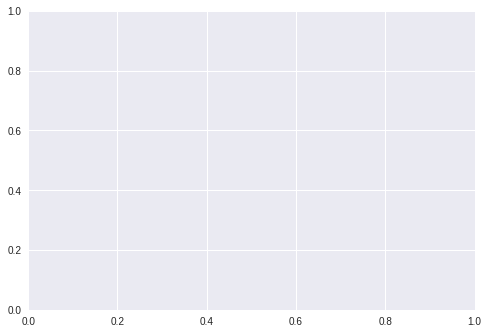

In [425]:
x1.plot.kde()# no difference in the plot after skewing it

In [424]:
import seaborn as sns
x2 = np.sqrt(train['Item_Visibility'])
x2.skew()

-0.09805554671154018

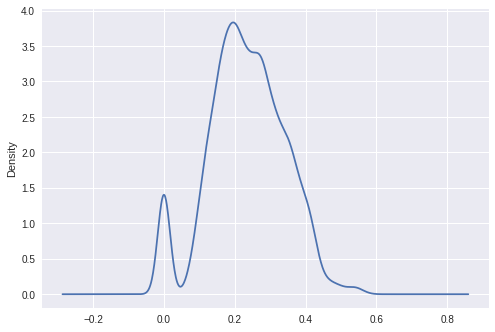

In [426]:
x2.plot.kde()

In [428]:
import seaborn as sns
x3 = np.cbrt(train['Item_Visibility'])
x3.skew()

-0.9473937405932142

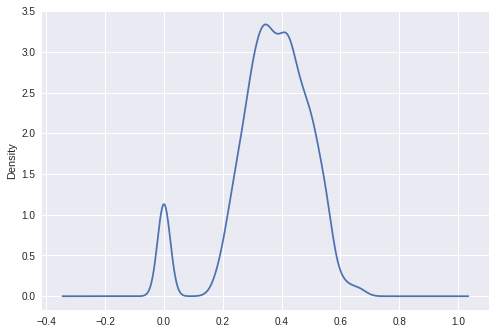

In [429]:
x3.plot.kde()

In [430]:
import seaborn as sns
x4 = np.exp(train['Item_Visibility'])
x4.skew()

1.3591516794941194

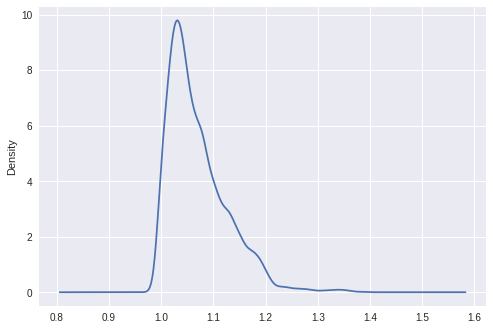

In [431]:
x4.plot.kde()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a83849240>,
      dtype=object)

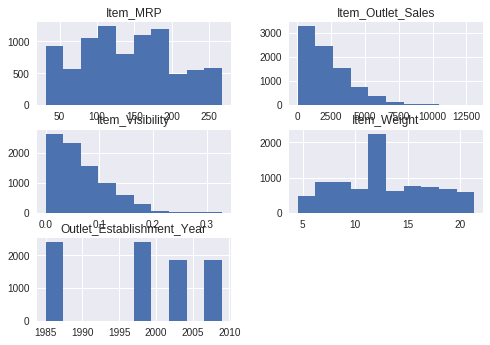

In [0]:
train.hist()

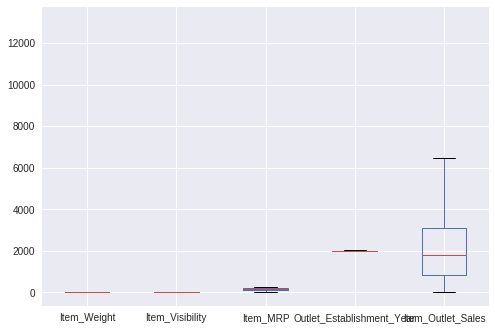

In [0]:
train.boxplot()

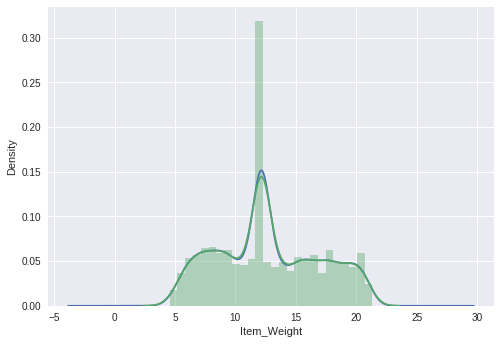

In [0]:
import seaborn as sns
train.Item_Weight.plot.kde()
sns.distplot(train.Item_Weight)

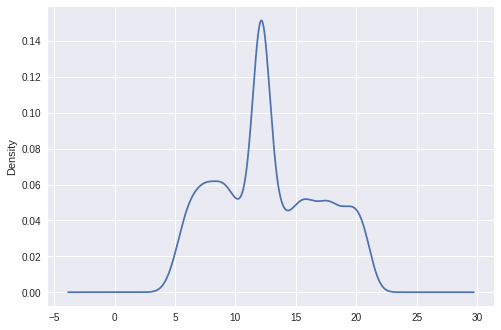

In [0]:
train.Item_Weight.plot.kde()

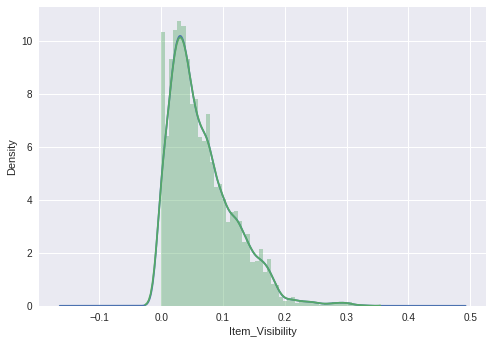

In [0]:
train.Item_Visibility.plot.kde()
sns.distplot(train.Item_Visibility)

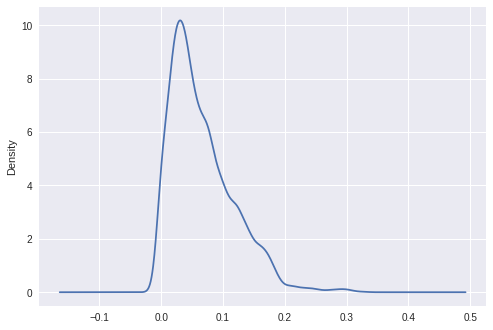

In [0]:
train.Item_Visibility.plot.kde()# before applying log

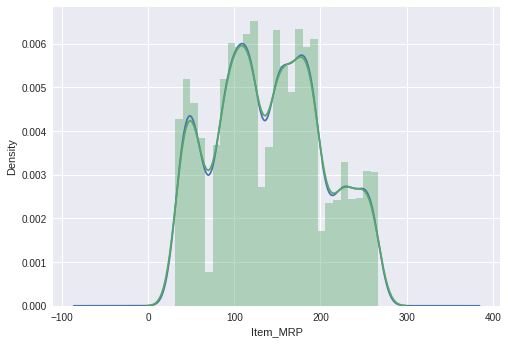

In [0]:
train.Item_MRP .plot.kde()
sns.distplot(train.Item_MRP)

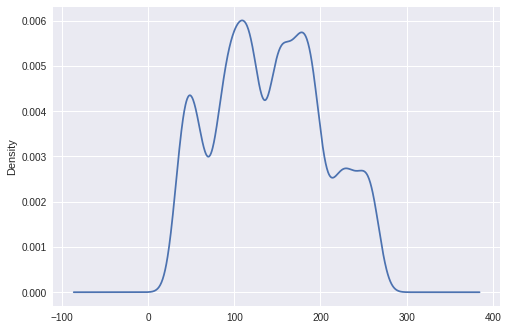

In [0]:
train.Item_MRP .plot.kde()

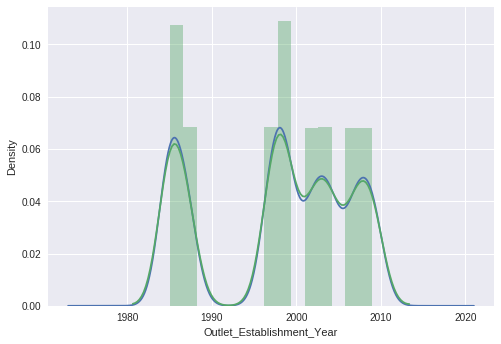

In [0]:
train.Outlet_Establishment_Year.plot.kde()
sns.distplot(train.Outlet_Establishment_Year)

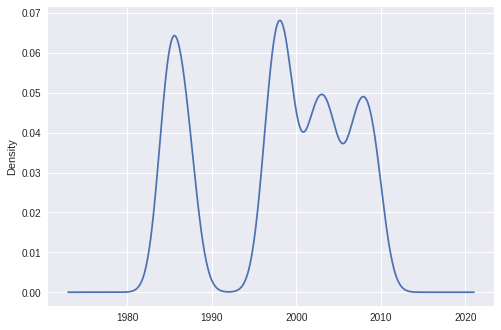

In [0]:
train.Outlet_Establishment_Year.plot.kde()

In [0]:
#univariate categorical variables
train.count()

Item_Weight                  8523
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  8523
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

In [0]:
train2 = pd.crosstab(index=train['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'],  
                              columns="count")

KeyError: ignored

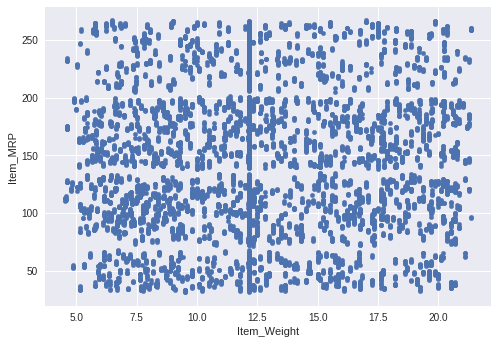

In [0]:
#Bivariate continuous & continuous(we need to do scatter plot and corr for c & c)
train.plot.scatter(x='Item_Weight',y='Item_MRP')

In [0]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017843,0.025258,0.035689,0.006443
Item_Visibility,-0.017843,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025258,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.035689,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.006443,-0.128625,0.567574,-0.049135,1.000000


In [0]:
#categorical & Categorical
z=pd.crosstab(index=[train["Item_Fat_Content"],train["Item_Type"],train["Outlet_Identifier"]],columns=[train["Outlet_Location_Type"],train["Outlet_Size"]],margins=True)

In [0]:
z

Outlet_Location_Type                                     Tier 1       Tier 2  \
Outlet_Size                                              Medium Small Medium   
Item_Fat_Content Item_Type             Outlet_Identifier                       
LF               Baking Goods          OUT013                 0     0      0   
                                       OUT017                 0     0      3   
                                       OUT018                 0     0      0   
                                       OUT019                 0     2      0   
                                       OUT027                 0     0      0   
                                       OUT035                 0     0      0   
                                       OUT045                 0     0      1   
                                       OUT046                 0     2      0   
                                       OUT049                 4     0      0   
                 Breads                OUT010                 0     0      0   
                                       OUT018                 0     0      0   
                                       OUT027                 0     0      0   
                 Breakfast             OUT013                 0     0      0   
                                       OUT018                 0     0      0   
                 Canned                OUT013                 0     0      0   
                                       OUT018                 0     0      0   
                                       OUT019                 0     1      0   
                                       OUT035                 0     0      0   
                                       OUT046                 0     5      0   
                                       OUT049                 2     0      0   
                 Dairy                 OUT010                 0     0      0   
                                       OUT013                 0     0      0   
                                       OUT017                 0     0      4   
                                       OUT018                 0     0      0   
                                       OUT019                 0     1      0   
                                       OUT035                 0     0      0   
                                       OUT045                 0     0      3   
                                       OUT046                 0     3      0   
                                       OUT049                 1     0      0   
                 Frozen Foods          OUT010                 0     0      0   
...                                                         ...   ...    ...   
reg              Frozen Foods          OUT049                 3     0      0   
                 Fruits and Vegetables OUT010                 0     0      0   
                                       OUT013                 0     0      0   
                                       OUT017                 0     0      5   
                                       OUT018                 0     0      0   
                                       OUT035                 0     0      0   
                                       OUT045                 0     0      3   
                                       OUT049                 5     0      0   
                 Meat                  OUT010                 0     0      0   
                                       OUT017                 0     0      1   
                                       OUT018                 0     0      0   
                                       OUT045                 0     0      1   
                                       OUT046                 0     1      0   
                                       OUT049                 2     0      0   
                 Snack Foods           OUT010                 0     0      0   
                                       OUT013                 0     0      0   


In [0]:
y=train['Item_Outlet_Sales']

In [0]:
train2=train.drop('Item_Outlet_Sales',axis=1)

In [0]:
train2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [0]:
train2=train.drop('Item_Visibility',axis=1)

In [0]:
train2.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [0]:
type(train2)

pandas.core.frame.DataFrame

In [0]:
type(y)

pandas.core.series.Series

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train2,y,test_size=0.3,random_state=0)

In [0]:
x_train1=pd.get_dummies(x_train)

In [0]:
x_train1.head()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
88,6.305,95.6436,1997,661.8052,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
6813,5.980,146.8418,2007,1765.7016,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4046,12.150,160.7920,1985,3675.2160,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
8194,12.150,157.8630,1985,469.3890,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
8293,9.100,47.2718,2004,850.8924,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [0]:
x_train1.shape

(5966, 45)

In [0]:
x_test1=pd.get_dummies(x_test)

In [0]:
x_test1.head()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4931,14.500,159.5604,2002,1426.1436,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4148,12.150,64.5510,1985,1201.7690,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
7423,11.500,129.6626,2007,1836.2764,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4836,10.195,143.1154,2007,2410.8618,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
944,21.000,195.0478,1987,1549.9824,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [0]:
x_test1.shape

(2557, 45)

In [0]:
##from sklearn.preprocessing import LabelEncoder
##le=LabelEncoder()
##for col in x_test.columns.values:
 ## if x_test[col].dtypes=='object':
   ## data=x_train[col].append(x_test[col])
    ##le.fit(data.values)
    ##x_train[col]=le.transform(x_train[col])
    ##x_test[col]=le.transform(x_test[col])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
x_train1

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
88,6.305,95.6436,1997,661.8052,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
6813,5.980,146.8418,2007,1765.7016,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4046,12.150,160.7920,1985,3675.2160,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
8194,12.150,157.8630,1985,469.3890,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
8293,9.100,47.2718,2004,850.8924,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4563,9.500,223.5088,2007,4697.8848,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
6948,16.350,98.1410,1998,386.1640,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4258,19.500,179.2002,1987,2865.6032,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
5371,20.500,90.6172,2009,1427.4752,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6857,14.600,109.8254,1987,1627.8810,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [0]:
y_train

88       661.8052
6813    1765.7016
4046    3675.2160
8194     469.3890
8293     850.8924
4563    4697.8848
6948     386.1640
4258    2865.6032
5371    1427.4752
6857    1627.8810
4055    2596.6200
219     1139.1838
7987    1222.4088
195      540.6296
5592    3435.5280
1640    3306.3628
2237    2311.6576
3977    3795.0600
7769     926.7936
3883    1779.0176
4918    3175.8660
8229    3466.1548
2213    4379.6324
3410    4207.8560
7637    1366.2216
5793    3588.6620
5213    3251.7672
7923    1010.6844
7084    2277.0360
7466     277.6386
          ...    
3219     814.9392
659     5764.4964
797      808.9470
755      669.1290
8291     451.4124
2496     770.3306
7599     334.2316
1871    3078.6592
2046     529.3110
7877     503.3448
4851     405.4722
5072    2631.2416
2163     659.1420
6036    3749.7856
6921     370.1848
6216    1105.2280
537     2187.1530
2897     892.1720
7768    1986.0814
2222    1571.2880
2599    6474.2392
705     2930.1858
3468    1761.7068
6744    2503.4080
5874    18

In [439]:
#dummies/one hot encoding
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=1)
rf.fit(x_train1,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [440]:
rf.score(x_train1,y_train)

0.9999411303011102

In [441]:
rf.score(x_test1,y_test)

0.9999618017394063

In [442]:
rf=RandomForestRegressor(random_state=1,n_estimators=15,min_samples_split=2)
rf.fit(x_train1,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [443]:
rf.score(x_train1,y_train)

0.9999478830735836

In [444]:
rf.score(x_test1,y_test)

0.9999635180175185

In [445]:
rf=RandomForestRegressor(random_state=1,n_estimators=15,min_samples_split=4)
rf.fit(x_train1,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [446]:
rf.score(x_train1,y_train)

0.9998560403388517

In [447]:
rf.score(x_test1,y_test)

0.9999548481392543

In [448]:
rf=RandomForestRegressor(random_state=1,n_estimators=15,min_samples_split=10)
rf.fit(x_train1,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [449]:
rf.score(x_train1,y_train)

0.9998315595629605

In [450]:
rf.score(x_test1,y_test)

0.9999105260410773

In [451]:
rf=RandomForestRegressor(random_state=1,n_estimators=50,min_samples_split=10)
rf.fit(x_train1,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [452]:
rf.score(x_train1,y_train)

0.9998268156674675

In [453]:
rf.score(x_test1,y_test)

0.9999112741162205

In [454]:
rf=RandomForestRegressor(random_state=1,n_estimators=50,min_samples_split=20)
rf.fit(x_train1,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=20,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [455]:
rf.score(x_train1,y_train)

0.9989683632047476

In [456]:
rf.score(x_test1,y_test)

0.9990866330442234

In [457]:
rf=RandomForestRegressor(random_state=1,n_estimators=100,min_samples_split=15)
rf.fit(x_train1,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [458]:
rf.score(x_train1,y_train)

0.9995070052121149

In [459]:
rf.score(x_test1,y_test)

0.9996044548204276

In [460]:
rf=RandomForestRegressor(random_state=1,n_estimators=100,min_samples_split=25)
rf.fit(x_train1,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=25,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [461]:
rf.score(x_train1,y_train)

0.9988491973321865

In [462]:
rf.score(x_test1,y_test)

0.999000453579024

In [463]:
rf=RandomForestRegressor(random_state=1,n_estimators=100,min_samples_split=35)
rf.fit(x_train1,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=35,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [464]:
rf.score(x_train1,y_train)

0.9987012911571027

In [465]:
rf.score(x_test1,y_test)

0.9988993144487519

In [466]:
rf=RandomForestRegressor(random_state=1,n_estimators=300,min_samples_split=35)
rf.fit(x_train1,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=35,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [467]:
rf.score(x_train1,y_train)

0.9987789267609656

In [468]:
rf.score(x_test1,y_test)

0.9989574978804338

In [469]:
rf=RandomForestRegressor(random_state=1,n_estimators=300,min_samples_split=50)
rf.fit(x_train1,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=50,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [470]:
rf.score(x_train1,y_train)

0.9985951978301054

In [471]:
rf.score(x_test1,y_test)

0.9988331574917082

In [0]:
rf=RandomForestRegressor(random_state=1,n_estimators=1000,min_samples_split=50)
rf.fit(x_train1,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=50,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [472]:
rf.score(x_train1,y_train)

0.9985951978301054

In [473]:
rf.score(x_test1,y_test)

0.9988331574917082

In [0]:
y_pred1=rf.predict(x_test1)

In [475]:
y_pred1

array([1429.51758699, 1199.44274119, 1835.21602791, ..., 1974.80700981,
       4209.15501281, 3237.52786778])

In [0]:
y_train1pred=rf.predict(x_train1)

In [479]:
y_train1pred

array([ 662.7000665 , 1762.9701395 , 3679.19649115, ..., 1442.07846702,
       3184.92947359, 4541.52310554])

In [477]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred1,y_test)

3553.1314171332265

In [480]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train1pred,y_train)

4009.360180371794

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'bootstrap':[True],
    'max_depth':[80,90,100,110],
    'max_features':[2,3],
    'min_samples_leaf':[3,4,5],
    'min_samples_split':[20,30,50,100,120],
    'n_estimators':[100,200,300,1000,2000]
}
rf=RandomForestRegressor()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(x_train1,y_train)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=100 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=200 
[CV

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   53.3s


[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=50, n_estimators=300, total=   1.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=50, n_estimators=300, total=   1.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=50, n_estimators=1000, total=   3.8s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=50, n_estimators=1000, total=   3.8s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=50, n_estimators=2000 
[CV]  bootstrap=True, max_depth=80, max_featur

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.0min


[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=300, total=   1.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=1000, total=   3.8s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=1000, total=   3.8s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=2000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=1000, total=   3.8s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=2000 
[CV]  bootstrap=True, max_depth=80, max_featu

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  9.6min


[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=120, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=120, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=120, n_estimators=200, total=   0.8s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=120, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=120, n_estimators=200, total=   0.8s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=120, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=120, n_estimators=200, total=   0.8s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=120, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_feat

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 17.1min


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=200, total=   0.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_feat

[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 26.9min


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=200, total=   0.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=30, n_estimators=2000, total=   7.9s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=300, total=   1.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=300, total=   1.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_f

[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 39.0min


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=200, total=   0.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_fea

[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 48.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [20, 30, 50, 100, 120], 'n_estimators': [100, 200, 300, 1000, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [339]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 20,
 'n_estimators': 100}

In [0]:
best_grid=grid_search.best_estimator_

In [336]:
best_grid

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [337]:
grid_search.best_score_

0.8081957612666631

In [0]:
def evaluate():
   grid_accuracy =evaluate(best_grid, test_features, test_labels)

In [0]:
from sklearn.metrics import explained_variance_score

In [0]:
y_pred = grid_search.predict(x_test1)

In [0]:
y_predtrain1=grid_search.predict(x_train1)

In [369]:
y_predtrain1

array([1489.6168687 , 1889.81918527, 3854.90119154, ..., 1457.57553143,
       2842.91785625, 3771.9908338 ])

In [370]:
explained_variance_score(y_train, y_predtrain1)

0.837794037863945

In [362]:
y_pred

array([1827.48690856, 2085.56837853, 1822.85523164, ..., 1681.83061578,
       3510.05391117, 3095.64370545])

In [363]:
explained_variance_score(y_test, y_pred)

0.8198900087253219

In [371]:
x_test1.head()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4931,14.500,159.5604,2002,1426.1436,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4148,12.150,64.5510,1985,1201.7690,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
7423,11.500,129.6626,2007,1836.2764,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4836,10.195,143.1154,2007,2410.8618,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
944,21.000,195.0478,1987,1549.9824,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [367]:
y_test.head()

4931    1426.1436
4148    1201.7690
7423    1836.2764
4836    2410.8618
944     1549.9824
Name: Item_Outlet_Sales, dtype: float64

In [434]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

548684.7689454268

In [435]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_predtrain1)

462944.85765309754

In [348]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

NameError: ignored

In [0]:
#label encoder
rf.score(x_train,y_train)

0.9999743246604431

In [0]:
rf.score(x_test,y_test)

0.9999724585465279

In [0]:
x_test.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4931,14.500,1,8,159.5604,7,2002,1,1,1,1426.1436
4148,12.150,1,13,64.5510,5,1985,1,2,3,1201.7690
7423,11.500,1,8,129.6626,2,2007,1,1,1,1836.2764
4836,10.195,1,5,143.1154,2,2007,1,1,1,2410.8618
944,21.000,1,13,195.0478,1,1987,0,2,1,1549.9824


In [0]:
y_test.head()

4931    1426.1436
4148    1201.7690
7423    1836.2764
4836    2410.8618
944     1549.9824
Name: Item_Outlet_Sales, dtype: float64

In [0]:
rf=RandomForestRegressor(random_state=1,n_estimators=20,min_samples_split=4)
rf.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [0]:
rf.score(x_train,y_train)

0.9998598578596899

In [0]:
rf.score(x_test,y_test)

0.99995093973044

In [0]:
rf=RandomForestRegressor(random_state=1,n_estimators=15,min_samples_split=4)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [0]:
rf=RandomForestRegressor(random_state=1,n_estimators=10,min_samples_split=6)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [0]:
rf.score(x_train,y_train)

0.999861387166273

In [0]:
rf.score(x_test,y_test)

0.9999459503226805

In [0]:
rf.score(x_train,y_train)

0.9998557095049888

In [0]:
rf.score(x_test,y_test)

0.9999491759543719

In [0]:
rf=RandomForestRegressor(random_state=1,n_estimators=15,min_samples_split=2)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [0]:
rf.score(x_train,y_train)

0.9999711703351541

In [0]:
rf.score(x_test,y_test)

0.999980229790122

In [0]:
rf=RandomForestRegressor(random_state=1,n_estimators=15,min_samples_split=2)
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_train_minmax=min_max.fit_transform(x_train)
X_test_minmax=min_max.fit_transform(x_test)
rf.fit(X_train_minmax,y_train)
rf.score(X_train_minmax,y_train)


0.9999711791755624

In [0]:
rf.score(X_test_minmax,y_test)

0.9836162802606918

In [0]:
rf=RandomForestRegressor(random_state=1,n_estimators=15,min_samples_split=4)
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_train_minmax=min_max.fit_transform(x_train)
X_test_minmax=min_max.fit_transform(x_test)
rf.fit(X_train_minmax,y_train)
rf.score(X_train_minmax,y_train)

0.9998557166292117

In [0]:
rf.score(X_test_minmax,y_test)

0.9835669480717114

In [0]:
rf=RandomForestRegressor(random_state=1,n_estimators=20,min_samples_split=6)
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_train_minmax=min_max.fit_transform(x_train)
X_test_minmax=min_max.fit_transform(x_test)
rf.fit(X_train_minmax,y_train)
rf.score(X_train_minmax,y_train)

0.9998568665279989

In [0]:
rf.score(X_test_minmax,y_test)

0.983440158477533

In [0]:
rf=RandomForestRegressor(random_state=1,n_estimators=50,min_samples_split=6)
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_train_minmax=min_max.fit_transform(x_train)
X_test_minmax=min_max.fit_transform(x_test)
rf.fit(X_train_minmax,y_train)
rf.score(X_train_minmax,y_train)

0.9998722796467392

In [0]:
rf.score(X_test_minmax,y_test)

0.9834731436769933

In [0]:
rf=RandomForestRegressor(random_state=1,n_estimators=50,min_samples_split=10)
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_train_minmax=min_max.fit_transform(x_train)
X_test_minmax=min_max.fit_transform(x_test)
rf.fit(X_train_minmax,y_train)
rf.score(X_train_minmax,y_train)

0.9998268141289548

In [0]:
rf.score(X_test_minmax,y_test)

0.9833108535422768

In [0]:
rf=RandomForestRegressor(random_state=1,n_estimators=100,min_samples_split=10)
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_train_minmax=min_max.fit_transform(x_train)
X_test_minmax=min_max.fit_transform(x_test)
rf.fit(X_train_minmax,y_train)
rf.score(X_train_minmax,y_train)

0.9998105416198695

In [0]:
rf.score(X_test_minmax,y_test)

0.9832967670063659